In [1]:
!nvidia-smi

Tue Dec  5 19:16:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install torch torchvision


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
import os

# Path to the zip file (you can use the file browser to get this path)
zip_file_path = '/content/drive/MyDrive/Dataset_Potholes/Pothole_Images (2)-20231121T011908Z-001.zip'

# Destination directory where you want to extract the files
destination_folder = '/content/pothholedetection/dataset'

# Create the destination folder if it does not exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(destination_folder)

print(f"Files extracted to: {destination_folder}")

Files extracted to: /content/pothholedetection/dataset


In [5]:
import os
import shutil
import random

# Set the root directory containing images and labels
root_dir = '/content/pothholedetection/dataset/Pothole_Images (2)/'

# Set the name of the dataset folder to create
dataset_name = '/content/pothholedetection/dataset/data_ready_for_training/'

# Set the ratios for splitting the dataset
train_ratio = 0.8
val_ratio = 0.1  # 10% for validation

# Set the names of the subdirectories for images and labels
image_subdir = 'images'
label_subdir = 'labels'

# Create the dataset folder structure
dataset_dir = os.path.join(root_dir, dataset_name)
os.makedirs(os.path.join(dataset_dir, 'train', image_subdir), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'train', label_subdir), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'test', image_subdir), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'test', label_subdir), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'val', image_subdir), exist_ok=True)
os.makedirs(os.path.join(dataset_dir, 'val', label_subdir), exist_ok=True)

# List and shuffle all image files
image_files = [f for f in os.listdir(root_dir) if f.endswith('.jpg')]  # List all .jpg files
random.shuffle(image_files)

# Calculate the number of files for train, test, and val sets
num_images = len(image_files)
num_train_files = int(train_ratio * num_images)
num_val_files = int(val_ratio * num_images)
num_test_files = num_images - num_train_files - num_val_files

# Function to copy files to a specific dataset
def copy_files(start_index, end_index, dataset_type):
    for i in range(start_index, end_index):
        image_name = image_files[i]
        label_name = os.path.splitext(image_name)[0] + '.txt'  # Assuming label file has .txt extension

        src_image_path = os.path.join(root_dir, image_name)
        dst_image_path = os.path.join(dataset_dir, dataset_type, image_subdir, image_name)
        shutil.copy(src_image_path, dst_image_path)

        src_label_path = os.path.join(root_dir, label_name)
        dst_label_path = os.path.join(dataset_dir, dataset_type, label_subdir, label_name)
        shutil.copy(src_label_path, dst_label_path)

# Copy files to train, test, and val directories
copy_files(0, num_train_files, 'train')
copy_files(num_train_files, num_train_files + num_test_files, 'test')
copy_files(num_train_files + num_test_files, num_images, 'val')

In [6]:
import yaml

def create_custom_yaml(path, nm_cls, classes):
    train_path = f"{path}/train"
    test_path = f"{path}/test"
    val_path = f"{path}/val"

    num_classes = nm_cls

    data = {
    'train': train_path,
    'test': test_path,
    'val': val_path,
    'nc': num_classes,
    'names': classes
    }

    with open('/content/potholes_data.yaml', 'w') as yaml_file:
        yaml.dump(data, yaml_file)

    print("YAML file created successfully.")

In [7]:
create_custom_yaml('/content/pothholedetection/dataset/data_ready_for_training', 1, ['potholes'])

YAML file created successfully.


In [8]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 16088, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 16088 (delta 10), reused 14 (delta 2), pack-reused 16056
Receiving objects: 100% (16088/16088), 14.71 MiB | 34.95 MiB/s, done.
Resolving deltas: 100% (11038/11038), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 654.0/654.0 kB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependen

Training



Feature Extraction

In [9]:
!python train.py --img 640 --batch 8 --epochs 100 --data '/content/potholes_data.yaml' --weights 'yolov5m.pt' --project 'runs_pothole' --name 'feature_extraction' --cache --freeze 10

2023-12-05 19:19:55.102791: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 19:19:55.102839: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 19:19:55.102865: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=/content/potholes_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, work

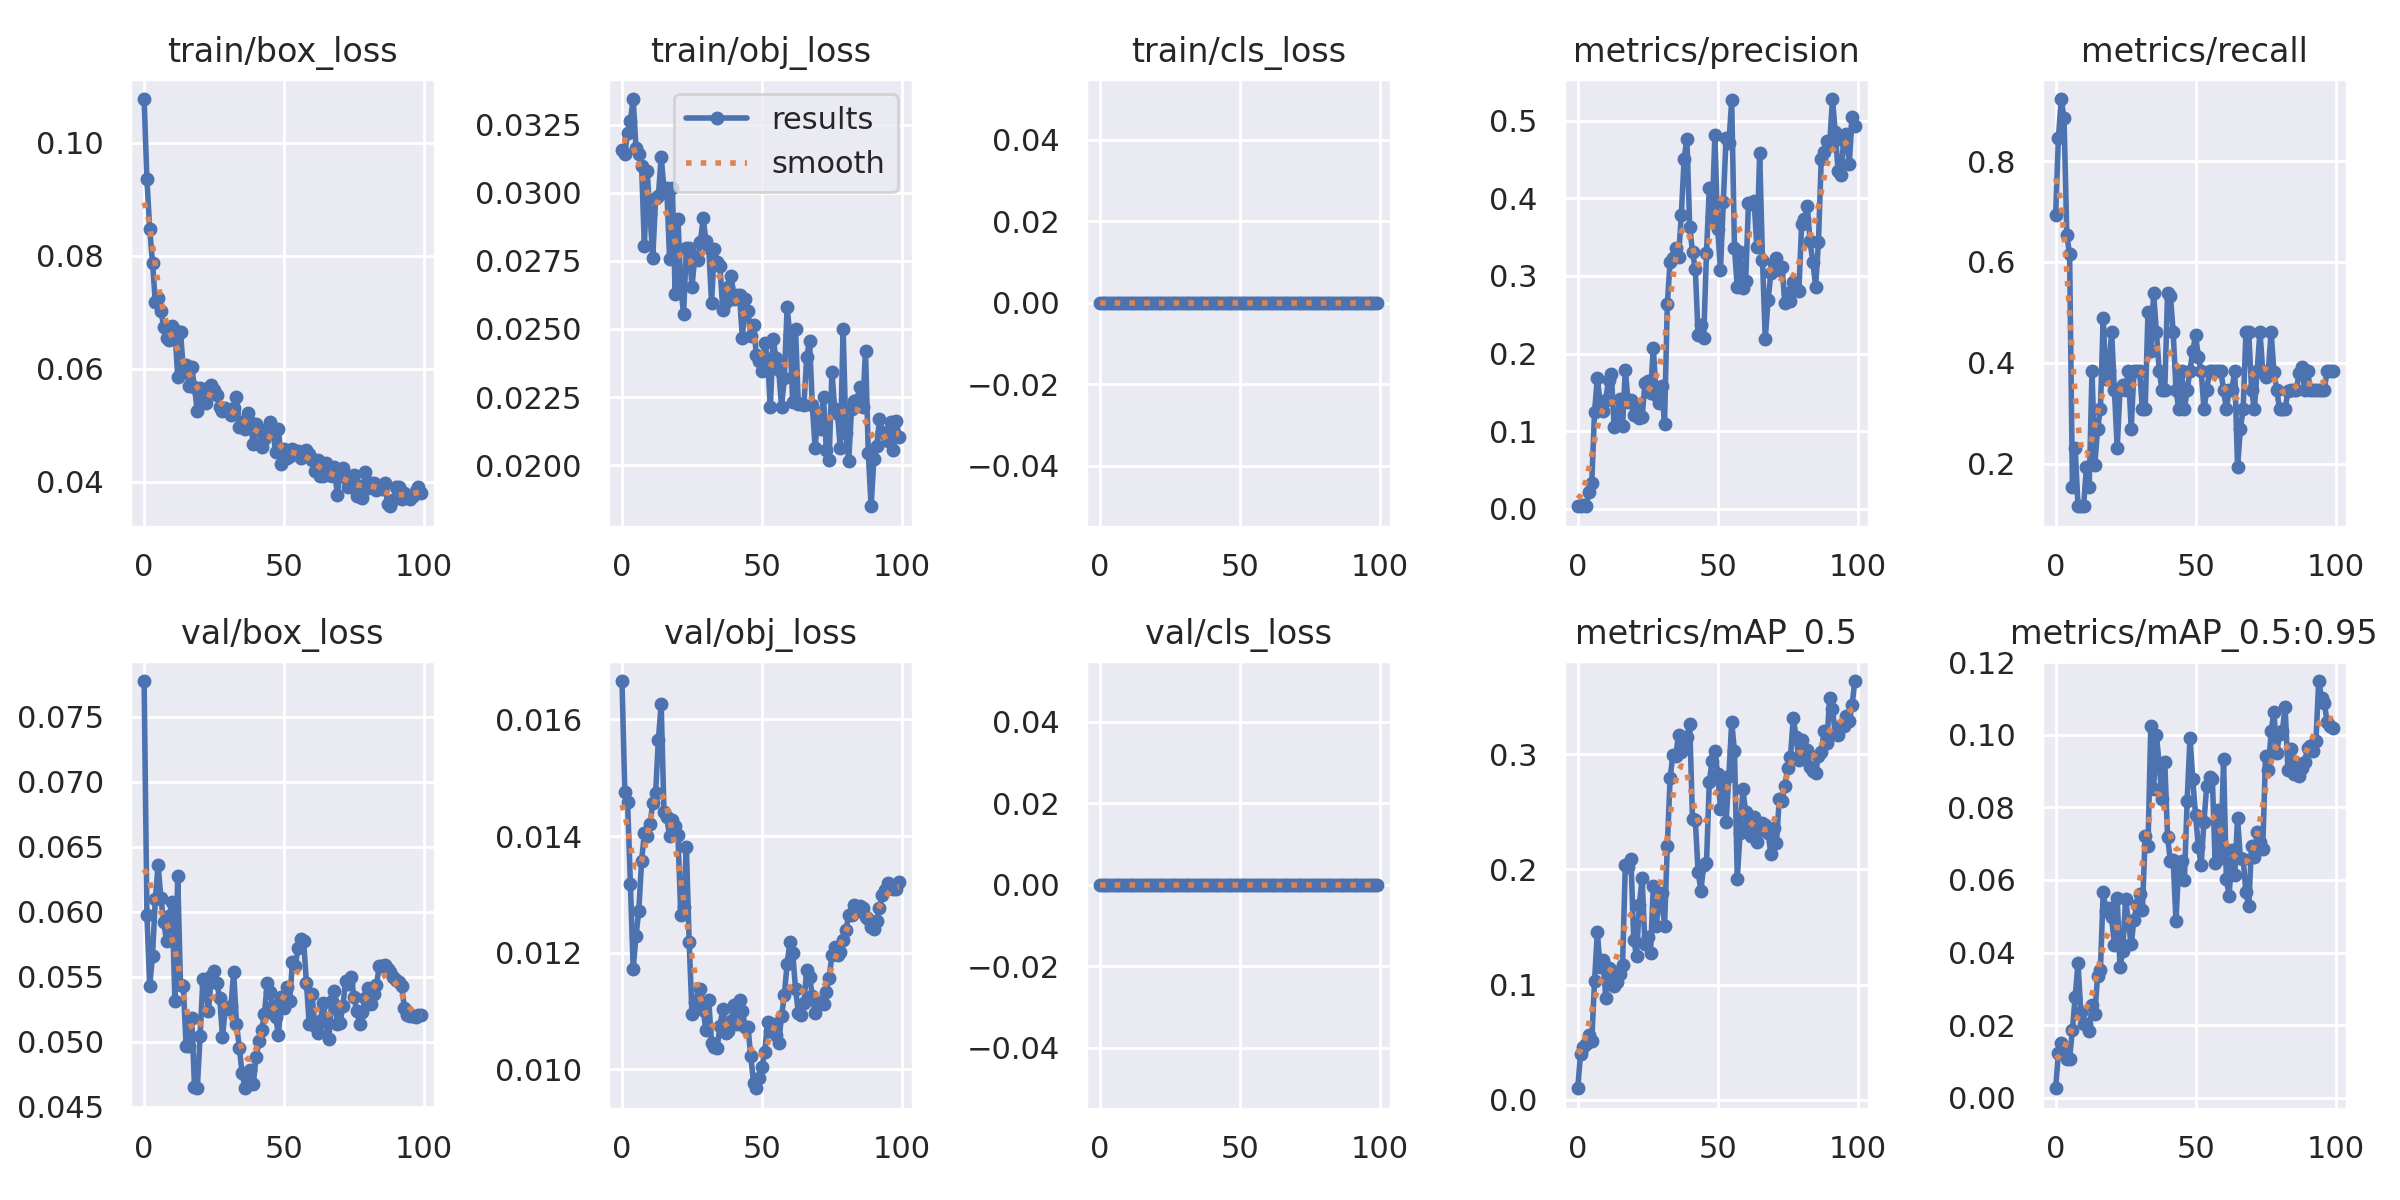

In [10]:
from IPython import display
display.Image(f"runs_pothole/feature_extraction/results.png")

Fine Tuning

In [11]:
!python train.py --img 640 --hyp '/content/yolov5/data/hyps/hyp.VOC.yaml' --batch 8 --epochs 100 --data '/content/potholes_data.yaml' --weights '/content/yolov5/runs_pothole/feature_extraction/weights/best.pt' --project 'runs_pothole' --name 'fine-tuning' --cache

2023-12-05 19:27:07.831277: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-05 19:27:07.831337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-05 19:27:07.831377: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=/content/yolov5/runs_pothole/feature_extraction/weights/best.pt, cfg=, data=/content/potholes_data.yaml, hyp=/content/yolov5/data/hyps/hyp.VOC.yaml, epochs=100, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scal

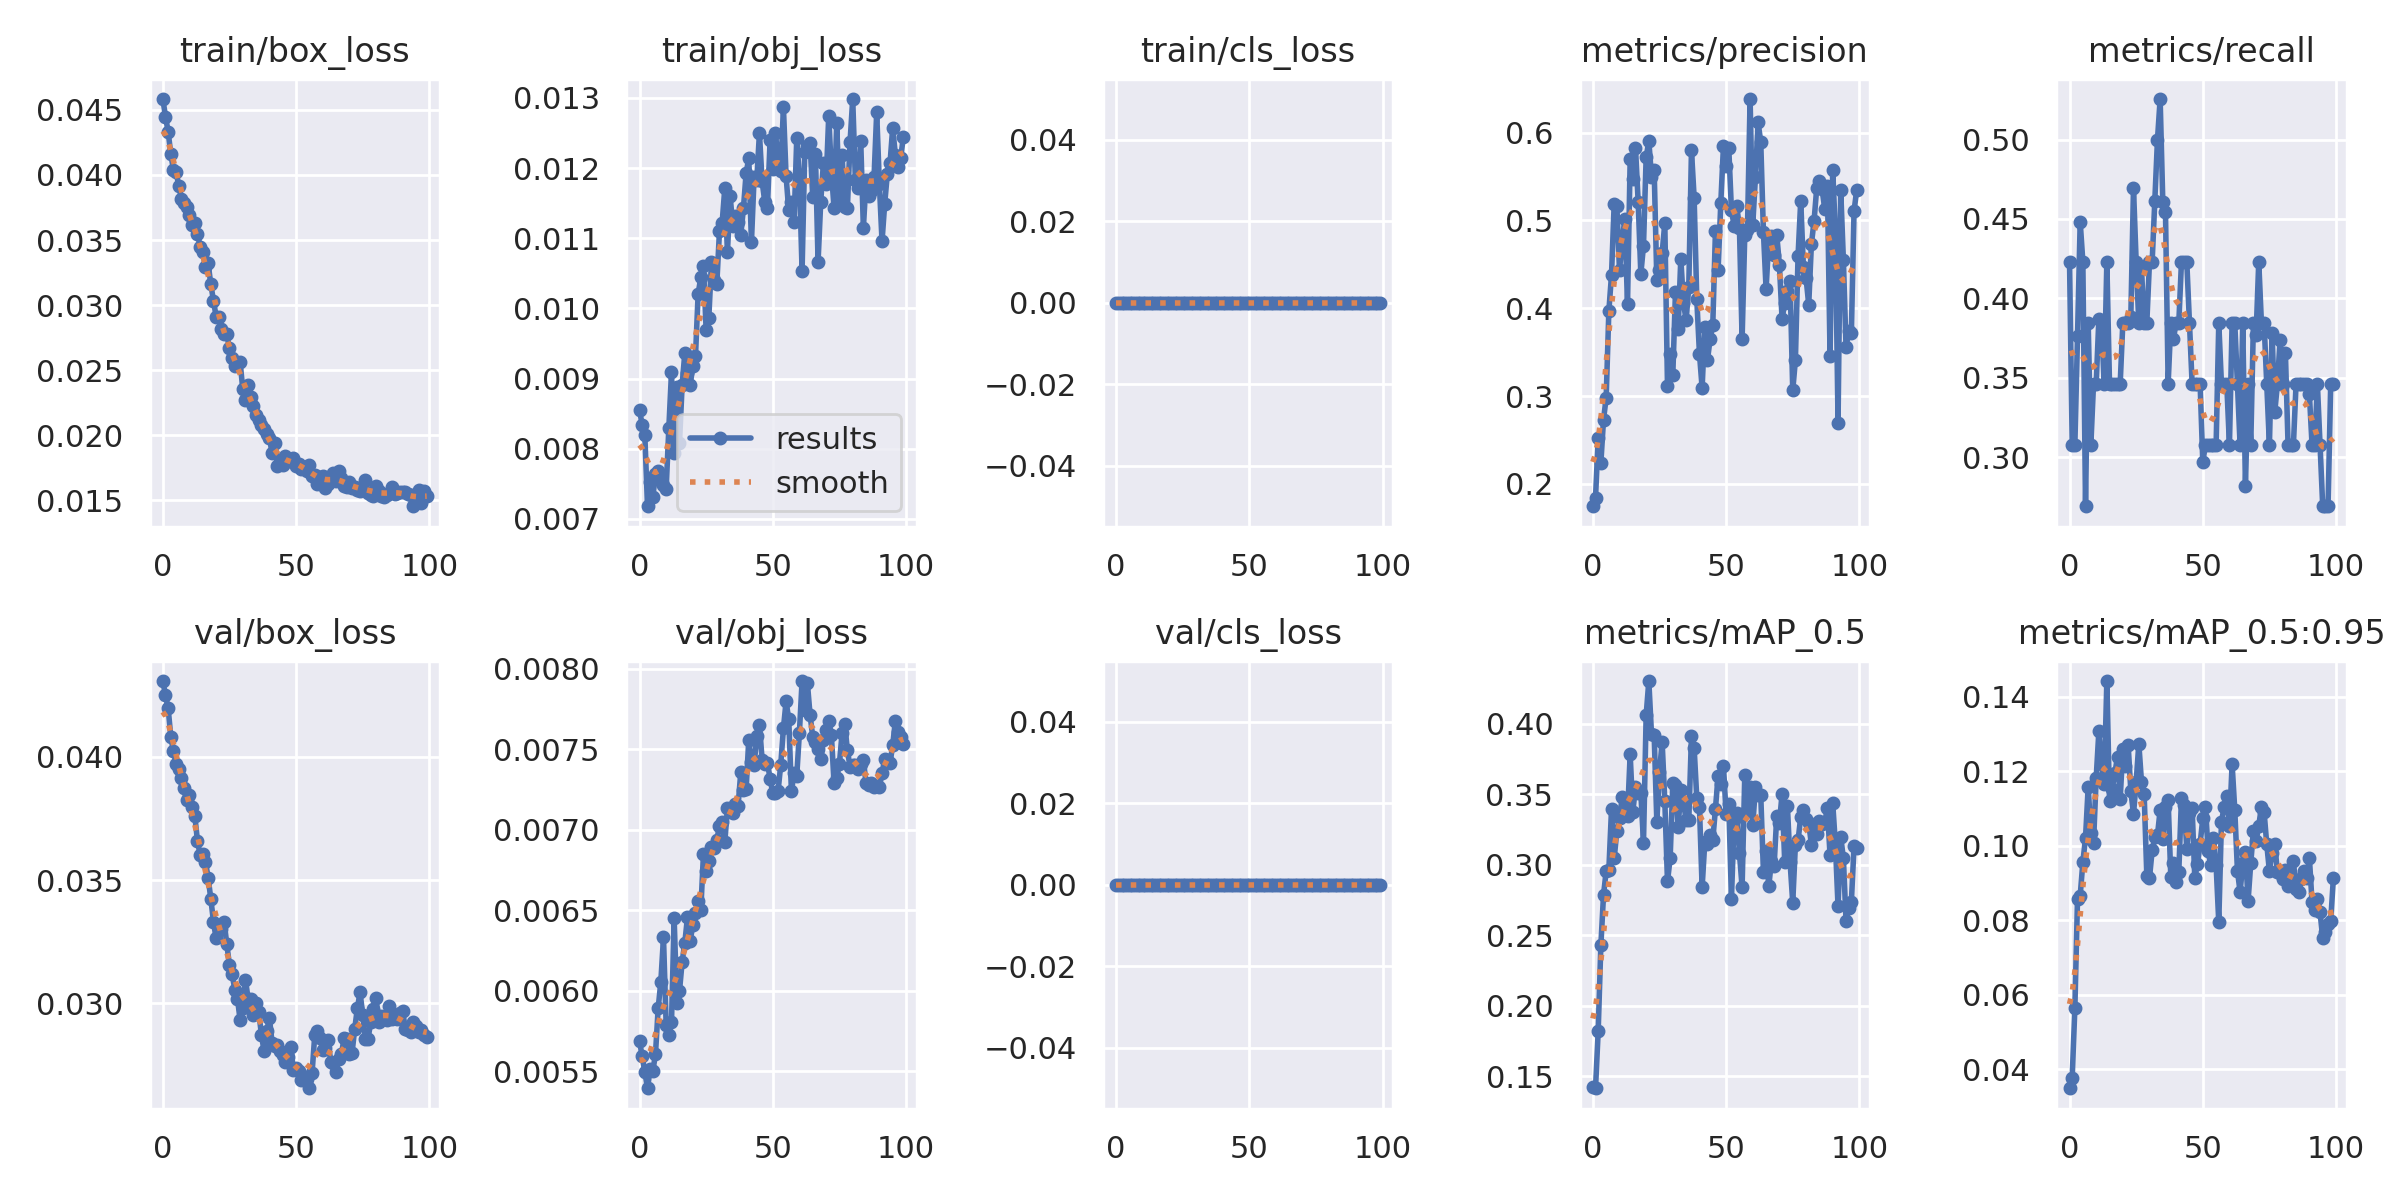

In [12]:
display.Image(f"runs_pothole/fine-tuning/results.png")

Validation

In [13]:
!python val.py --weights 'runs_pothole/fine-tuning/weights/best.pt' --batch 8 --data '/content/potholes_data.yaml' --task test --project 'runs_pothole' --name 'validation_on_test_data' --augment


val: data=/content/potholes_data.yaml, weights=['runs_pothole/fine-tuning/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=True, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs_pothole, name=validation_on_test_data, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
test: Scanning /content/pothholedetection/dataset/data_ready_for_training/test/labels... 18 images, 0 backgrounds, 0 corrupt: 100% 18/18 [00:00<00:00, 28.39it/s]
test: WARNING ⚠️ /content/pothholedetection/dataset/data_ready_for_training/test/images/168.jpg: corrupt JPEG restored and saved
test: WARNING ⚠️ /content/pothholedetection/dataset/data_ready_for_training/test/images/172.jpg: corrupt JPEG restored and saved

Plot Precision Recall-Curve

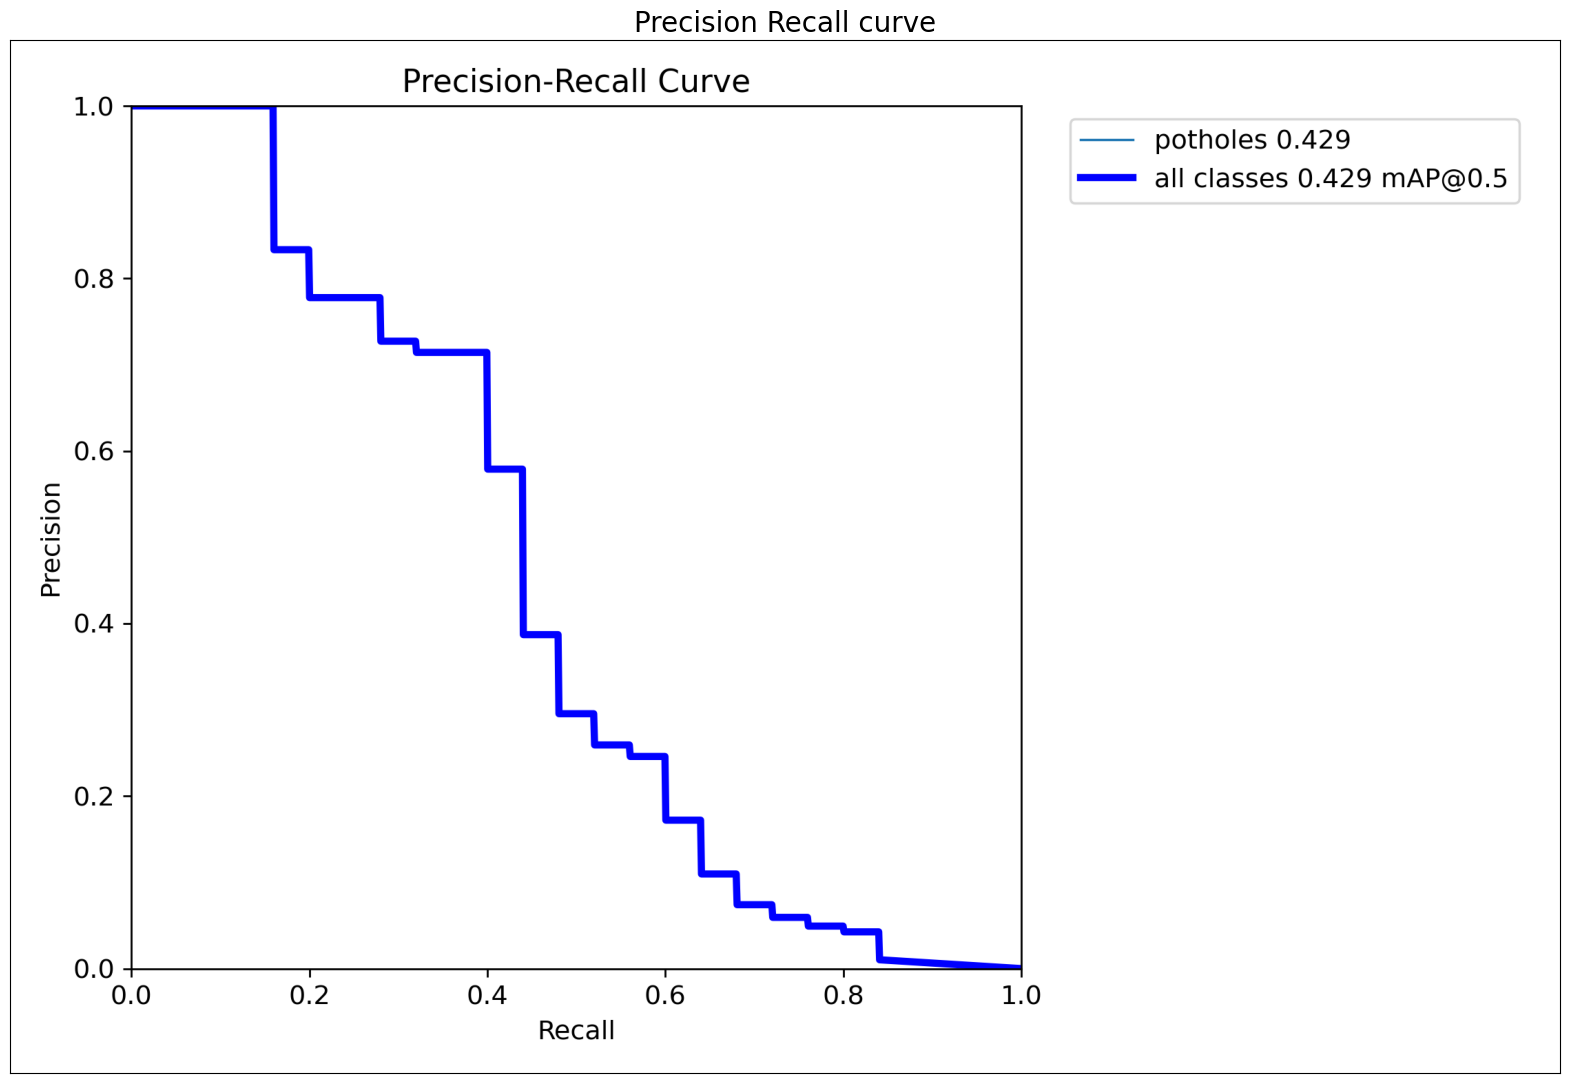

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(20,20))
plt.plot(figsize=(20,20))
plt.title('Precision Recall curve', fontsize=20)
plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.imshow(mpimg.imread('runs_pothole/validation_on_test_data/PR_curve.png'))


Inference

In [15]:
!python detect.py --source '/content/pothholedetection/dataset/data_ready_for_training/test/images' --weights 'runs_pothole/fine-tuning/weights/best.pt' --max-det 3  --conf-thres 0.25 --classes 0 --name 'detect_test'

detect: weights=['runs_pothole/fine-tuning/weights/best.pt'], source=/content/pothholedetection/dataset/data_ready_for_training/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=3, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=[0], agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=detect_test, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-247-g3f02fde Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20852934 parameters, 0 gradients, 47.9 GFLOPs
image 1/18 /content/pothholedetection/dataset/data_ready_for_training/test/images/107.jpg: 640x480 1 potholes, 47.5ms
image 2/18 /content/pothholedetection/dataset/data_ready_for_training/test/images/108.jpg: 640x480 1 potholes, 20.5ms
image 3/18 /content/pothhole

View Results

In [ ]:
from IPython.display import Image, display
import os

# Path to the folder containing images
folder_path = '//content/yolov5/runs/detect/detect_test'

# Display all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)
        display(Image(filename=file_path))


Ouput Cleared since it made the file too large to convert to pdf